In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from flask import Flask, jsonify

In [5]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).scalar()

'2017-08-23'

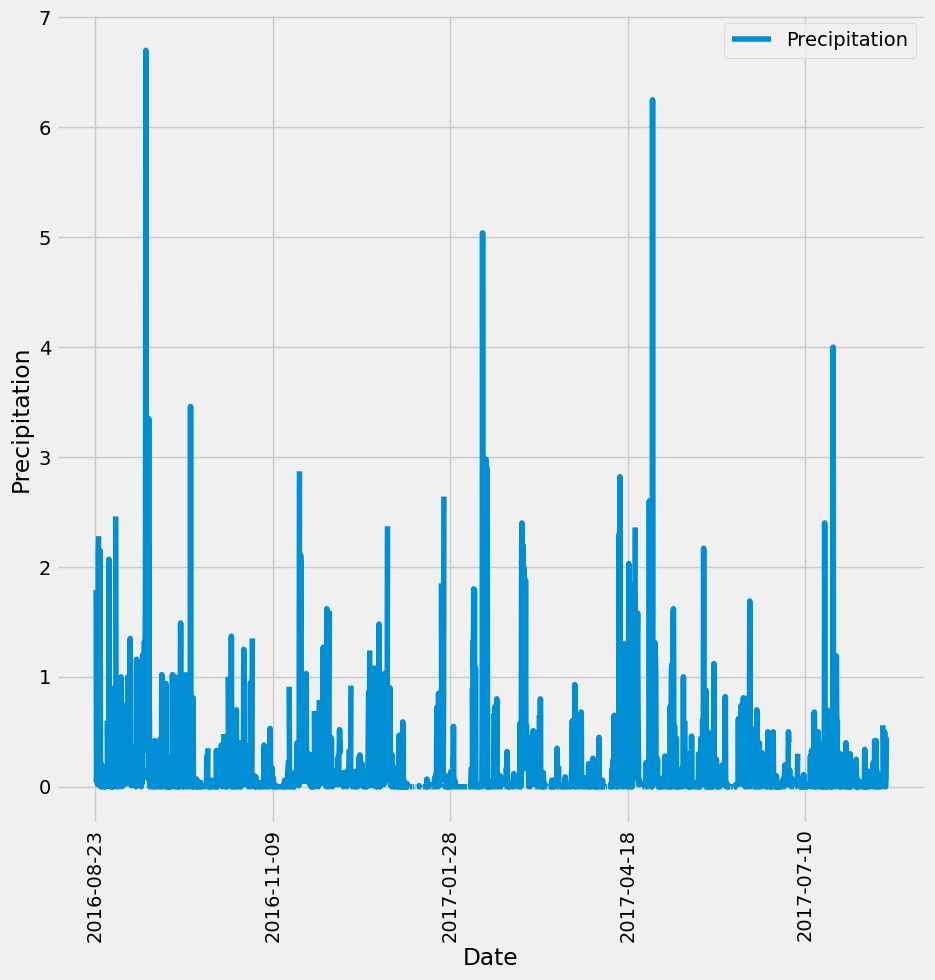

In [157]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = session.query(func.max(Measurement.date)).scalar()
# Calculate the date one year from last date in data set. looked up how to do this 
year_ago = dt.datetime.strptime(last_date, "%Y-%m-%d") - dt.timedelta(days=365)
q_date = year_ago.strftime('%Y-%m-%d')
# Perform a query to retrieve the data and precipitation scores
annual_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()
# Save the query results as a Pandas DataFrame. 
annual_precip_df = pd.DataFrame(annual_precip)
annual_precip_df.columns = ["Date", "Precipitation"]

# Sort the dataframe by date
sorted_df = annual_precip_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data. used this method compared to plt thanks to learning assistant sibu
sorted_df.plot(x='Date', y='Precipitation', rot=90, figsize=(10,10))
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend(["Precipitation"])
plt.savefig("Images/Precip_Plot.png")

In [80]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [83]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [104]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#encountered some error with following query for most active station so declared top_station variable
stations = session.query(Station.station, func.count(Measurement.station)).filter(Station.station == Measurement.station).group_by(Station.station).order_by(func.count(Measurement.station).desc()).all()
top_station = stations[0]
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [103]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station==top_station[0]).all()
most_active

[(54.0, 85.0, 71.66378066378067)]

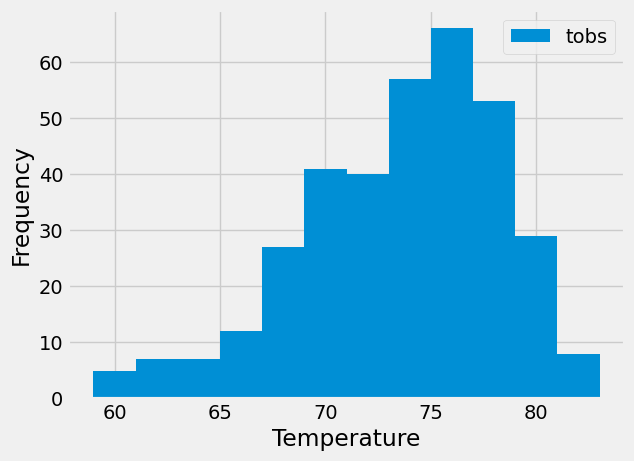

In [156]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps_most_active = session.query(Measurement.tobs).filter(Measurement.date.between(q_date,last_date),Measurement.station == 'USC00519281').all()
# used website "geeks" source to flatten results of query for hist, before np.ravel it did not make sense
plt.hist(np.ravel(temps_most_active), bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.savefig("Images/Temp_Hist.png")

# Close Session

In [16]:
# Close Session
session.close()